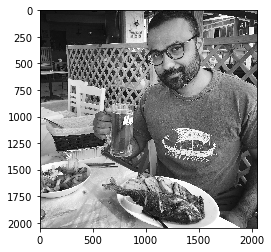

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'data/IMG_0126.png'

# load color image
bgr_img = cv2.imread(img_path)

# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap = 'gray')
plt.show()

In [9]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [10]:
filter_vals

array([[-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1]])

In [11]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


## Define a convolutional layer

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
# create a tensor
torch.from_numpy(filters)

tensor([[[-1, -1,  1,  1],
         [-1, -1,  1,  1],
         [-1, -1,  1,  1],
         [-1, -1,  1,  1]],

        [[ 1,  1, -1, -1],
         [ 1,  1, -1, -1],
         [ 1,  1, -1, -1],
         [ 1,  1, -1, -1]],

        [[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [ 1,  1,  1,  1],
         [ 1,  1,  1,  1]],

        [[ 1,  1,  1,  1],
         [ 1,  1,  1,  1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]]])

In [14]:
torch.from_numpy(filters).unsqueeze(1)

tensor([[[[-1, -1,  1,  1],
          [-1, -1,  1,  1],
          [-1, -1,  1,  1],
          [-1, -1,  1,  1]]],


        [[[ 1,  1, -1, -1],
          [ 1,  1, -1, -1],
          [ 1,  1, -1, -1],
          [ 1,  1, -1, -1]]],


        [[[-1, -1, -1, -1],
          [-1, -1, -1, -1],
          [ 1,  1,  1,  1],
          [ 1,  1,  1,  1]]],


        [[[ 1,  1,  1,  1],
          [ 1,  1,  1,  1],
          [-1, -1, -1, -1],
          [-1, -1, -1, -1]]]])

In [15]:
# Understanding unsqeeze
x = torch.tensor([1, 2, 3, 4])

In [16]:
x

tensor([1, 2, 3, 4])

In [17]:
x.unsqueeze(0)

tensor([[1, 2, 3, 4]])

In [18]:
x.unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4]])

In [22]:
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

In [23]:
weight

tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

In [24]:
weight.shape

torch.Size([4, 1, 4, 4])

In [25]:
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x

In [26]:
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [27]:
# Visualize the output

# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

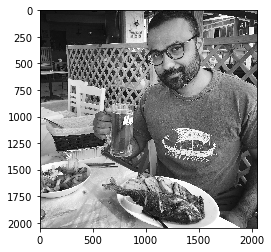

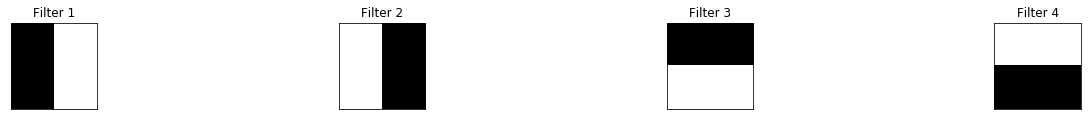

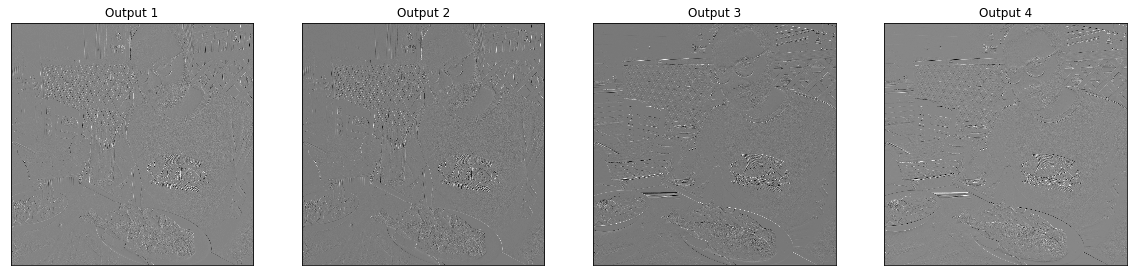

In [28]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

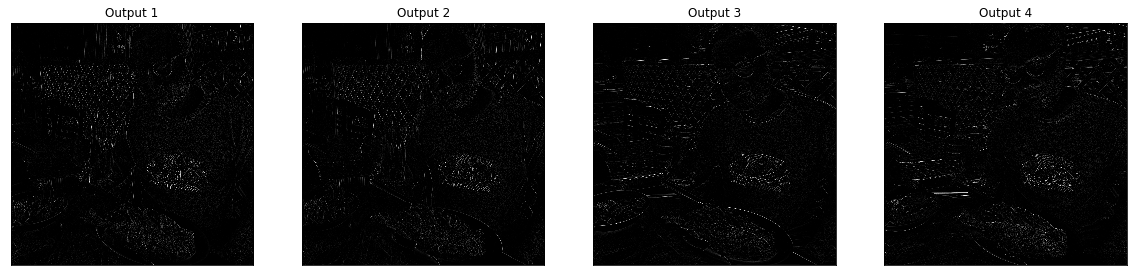

In [29]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)